In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
routes = pd.read_csv('data/routes.dat', sep=',', encoding='utf-8')
routes.columns = ['Airline','AirlineID','SourceAirport','SourceAirportID','DestinationAirport','DestinationAirportID','Codeshare','Stops','Equipment']
routes.head()

,Airline,AirlineID,SourceAirport,SourceAirportID,DestinationAirport,DestinationAirportID,Codeshare,Stops,Equipment
0,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
2,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
3,2B,410,CEK,2968,OVB,4078,NaN,0,CR2
4,2B,410,DME,4029,KZN,2990,NaN,0,CR2


In [4]:
routes.Airline.describe()

count     67662
unique      568
top          FR
freq       2484
Name: Airline, dtype: object

In [5]:
routes.Airline.unique()

array(['2B', '2G', '2I', '2J', '2K', '2L', '2N', '2O', '2P', '2Z', '3E',
       '3F', '3G', '3H', '3J', '3K', '3L', '3M', '3O', '3P', '3R', '3S',
       '3U', '4B', '4D', '4E', '4G', '4H', '4K', '4M', '4N', '4O', '4Q',
       '4T', '4U', '4W', '4Y', '5C', '5G', '5H', '5J', '5M', '5N', '5P',
       '5Q', '5T', '5U', '5Z', '6E', '6H', '6I', '6L', '6R', '6T', '6W',
       '6Y', '7C', '7E', '7F', '7G', '7H', '7I', '7J', '7M', '7P', '7R',
       '7S', '8B', '8D', '8E', '8I', '8L', '8M', '8P', '8Q', '8R', '8T',
       '8U', '8V', '9C', '9D', '9E', '9K', '9M', '9N', '9Q', '9R', '9U',
       '9V', '9W', 'A2', 'A3', 'A4', 'A5', 'A8', 'A9', 'AA', 'AB', 'ABJ',
       'AC', 'AD', 'AE', 'AF', 'AH', 'AI', 'AK', 'AM', 'AP', 'AR', 'AS',
       'AT', 'AV', 'AW', 'AY', 'AZ', 'B2', 'B5', 'B6', 'B7', 'B9', 'BA',
       'BB', 'BC', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BK', 'BL', 'BM',
       'BP', 'BR', 'BT', 'BU', 'BV', 'BW', 'BX', 'C8', 'CA', 'CC', 'CE',
       'CG', 'CI', 'CM', 'CN', 'CU', 'CX', 'CY', '

In [6]:
airlines = pd.read_csv('data/airlines.dat', sep=',', encoding='utf-8')
airlines.columns = ['Airline ID', 'Name', 'Alias',  'IATA', 'ICAO','Callsign','Country','Active']
airlines.head()

,Airline ID,Name,Alias,IATA,ICAO,Callsign,Country,Active
0,1,Private flight,\N,-,NaN,NaN,NaN,Y
1,2,135 Airways,\N,NaN,GNL,GENERAL,United States,N
2,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y
3,4,2 Sqn No 1 Elementary Flying Training School,\N,NaN,WYT,NaN,United Kingdom,N
4,5,213 Flight Unit,\N,NaN,TFU,NaN,Russia,N


In [7]:
airlines.Name.nunique()

6072

In [8]:
airports = pd.read_csv('data/airports.dat', sep=',', encoding='utf-8')
airports.columns = ['Airport ID', 'Name', 'City', 'Country',  'IATA', 'ICAO','Latitude','Longitude','Altitude', 'Timezone','DST', 'Tz database time zone', 'Type', 'Source']
airports.head()

,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source
0,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
1,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
2,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
3,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports
4,6,Wewak International Airport,Wewak,Papua New Guinea,WWK,AYWK,-3.583830,143.669006,19,10,U,Pacific/Port_Moresby,airport,OurAirports


In [9]:
alliances = pd.read_csv('data/alliances.dat', sep=',', encoding='utf-8')
print('number of airlines in an alliance: ', alliances.Airline.nunique())
print('Number of airlines per Alliance: ', alliances.groupby(['Alliance']).count())
alliances.head()

number of airlines in an alliance:  60
Number of airlines per Alliance:                 Airline
Alliance              
One World           14
SkyTeam             20
Star Alliance       26


,Alliance,Airline
0,Star Alliance,Adria Airways
1,Star Alliance,Aegean Airlines
2,Star Alliance,Air Canada
3,Star Alliance,Air China
4,Star Alliance,Air New Zealand


In [10]:
airl_alliances_all  = pd.merge(alliances, airlines, left_on='Airline', right_on='Name', how = 'left')
print('number of airlines with alliance: ', airl_alliances_all.Airline.nunique())
airl_alliances_all.head()

number of airlines with alliance:  60


,Alliance,Airline,Airline ID,Name,Alias,IATA,ICAO,Callsign,Country,Active
0,Star Alliance,Adria Airways,83,Adria Airways,\N,JP,ADR,ADRIA,Slovenia,Y
1,Star Alliance,Aegean Airlines,96,Aegean Airlines,\N,A3,AEE,AEGEAN,Greece,Y
2,Star Alliance,Air Canada,330,Air Canada,\N,AC,ACA,AIR CANADA,Canada,Y
3,Star Alliance,Air China,751,Air China,\N,CA,CCA,AIR CHINA,China,Y
4,Star Alliance,Air New Zealand,345,Air New Zealand,\N,NZ,ANZ,NEW ZEALAND,New Zealand,Y


In [11]:
# retain useful columns
airl_alliances = airl_alliances_all[['Alliance', 'Name', 'IATA', 'Country']].copy()

In [12]:
# merge to the route dataframe
routes_alce = pd.merge(routes, airl_alliances, left_on = 'Airline', right_on = 'IATA', how = 'left')
print('Number of edeges before the merge and after: ', routes.Airline.count(), routes_alce.Airline.count())

Number of edeges before the merge and after:  67662 67662


In [13]:
print('Number of alliances-airlines found in the route data: ', routes_alce[~routes_alce.IATA.isnull()].IATA.nunique())
print('Number of flights (edges) flown by alliances-airlines: ', routes_alce[~routes_alce.IATA.isnull()].Airline.count())

Number of alliances-airlines found in the route data:  60
Number of flights (edges) flown by alliances-airlines:  29349


In [31]:
# only alliances airlines
routes_alce_only = routes_alce[~routes_alce.IATA.isnull()]
routes_alce_only.head()

,Airline,AirlineID,SourceAirport,SourceAirportID,DestinationAirport,DestinationAirportID,Codeshare,Stops,Equipment,Alliance,Name,IATA,Country
4237,A3,96,AOK,1459,ATH,3941,NaN,0,DH4,Star Alliance,Aegean Airlines,A3,Greece
4238,A3,96,AOK,1459,KSJ,1461,NaN,0,DH8,Star Alliance,Aegean Airlines,A3,Greece
4239,A3,96,AOK,1459,RHO,1472,NaN,0,DH8,Star Alliance,Aegean Airlines,A3,Greece
4240,A3,96,ARN,737,KLX,1456,NaN,0,319,Star Alliance,Aegean Airlines,A3,Greece
4241,A3,96,ARN,737,SKG,1486,Y,0,736,Star Alliance,Aegean Airlines,A3,Greece


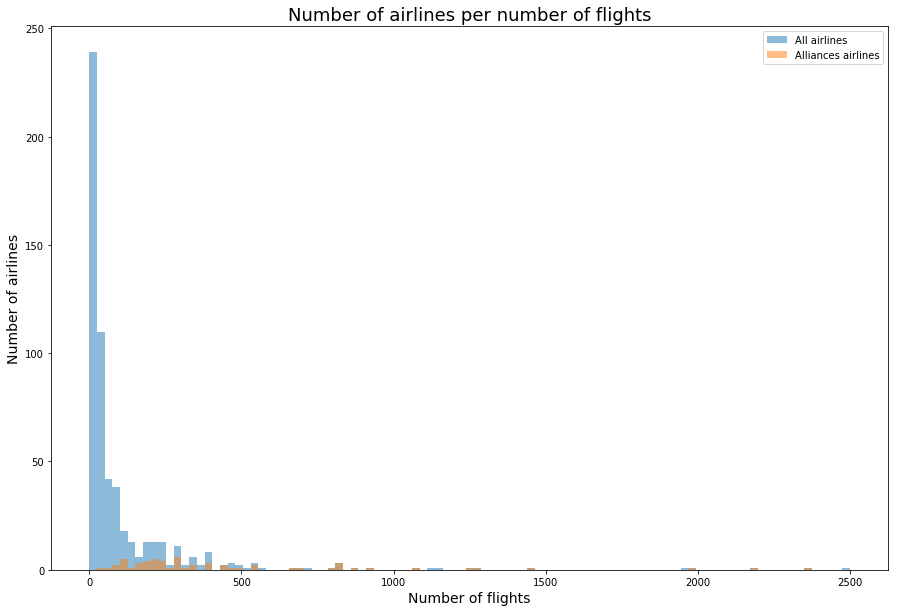

In [44]:
bins = np.linspace(0, 2500, 100)
plt.figure(figsize=(15,10))
plt.hist(routes_alce[['Airline']].groupby('Airline').size(), bins, alpha=0.5, label='All airlines')
plt.hist(routes_alce_only[['Airline']].groupby('Airline').size(), bins, alpha=0.5, label='Alliances airlines')
plt.legend(loc='upper right')
plt.title('Number of airlines per number of flights', fontsize = 18)
plt.ylabel('Number of airlines', fontsize = 14)
plt.xlabel('Number of flights', fontsize= 14)
plt.savefig('Histogram_flights_airlines.pdf')
plt.show()


In [63]:
df = routes_alce[['Airline', 'Alliance', 'Name']].groupby(['Airline', 'Alliance', 'Name']).size().reset_index(name='counts')

In [64]:
df.head()

,Airline,Alliance,Name,counts
0,A3,Star Alliance,Aegean Airlines,222
1,AA,One World,American Airlines,2354
2,AB,One World,Air Berlin,798
3,AC,Star Alliance,Air Canada,705
4,AF,SkyTeam,Air France,1071


In [67]:
# annotation alliances
df[df.counts>1000]

,Airline,Alliance,Name,counts
1,AA,One World,American Airlines,2354
4,AF,SkyTeam,Air France,1071
12,CA,Star Alliance,Air China,1260
16,CZ,SkyTeam,China Southern Airlines,1454
17,DL,SkyTeam,Delta Air Lines,1981
34,MU,SkyTeam,China Eastern Airlines,1263
55,UA,Star Alliance,United Airlines,2180


In [75]:
# annotation
routes_nonall = routes_alce[routes_alce.IATA.isnull()]
df_nonall = routes_nonall[['Airline']].groupby('Airline').size().reset_index(name='counts')
df_nonall[df_nonall.counts>1000]

,Airline,counts
180,FR,2484
421,U2,1130
433,US,1960
463,WN,1146
